Contents 
1. Import libraries 
2. Create a bar chart, histogram, scatterplot, and line chart 
3. Create a histogram of the “order_hour_of_day” column
4. Create a bar chart from the “loyalty_flag” column
5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
6. Create age and family situation line chart 
7. Create scatterplot between age and income 
8. Export visualizations 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/05-08-2023 Instacart Basket Analysis /'

In [3]:
#import customer_merged data 
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','customer_merged.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

Step 2: create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

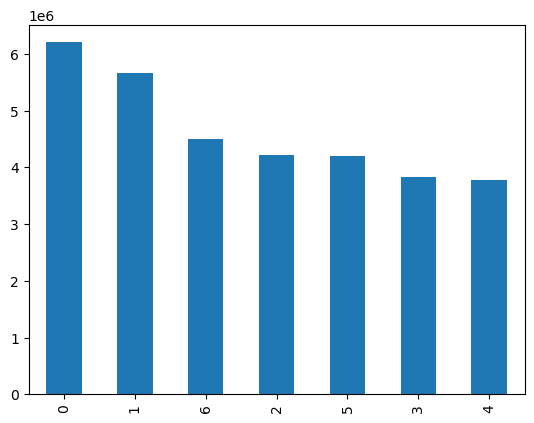

In [5]:
#create bar chart 
bar = df['orders_day_of_week'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

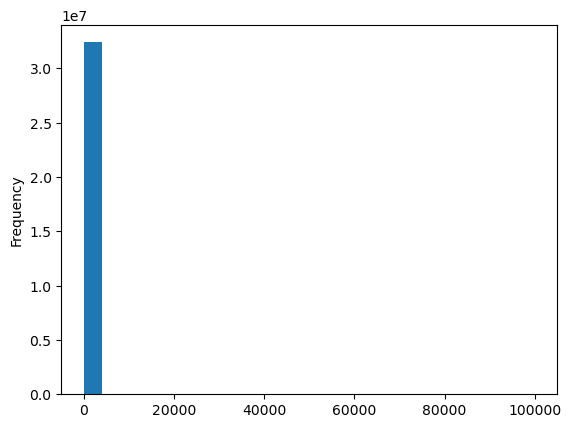

In [6]:
#create histogram 
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

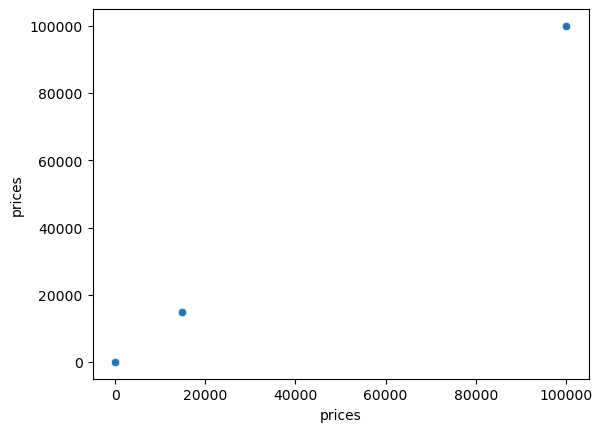

In [7]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [8]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,mean_freq,freq_flag,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income,First Name
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly days,Most orders,47,Loyal customer,22.232456,High spender,6.877743,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Craig
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Slowest days,Most orders,47,Loyal customer,22.232456,High spender,6.877743,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Craig
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,48,Loyal customer,24.275229,High spender,8.704887,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,Nicole
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Regularly days,Average orders,29,Regular customer,12.885714,High spender,11.784367,Regular customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,Alice
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly days,Most orders,18,Regular customer,9.131356,Low spender,14.504587,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,Jerry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Busiest days,Average orders,5,New customer,3.234043,Low spender,11.250000,Regular customer,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,nan
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Least busy,Slowest days,Most orders,13,Regular customer,6.862069,Low spender,12.480000,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,Diana
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Regularly days,Most orders,7,New customer,4.768293,Low spender,22.278481,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,Johnny
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Least busy,Slowest days,Average orders,4,New customer,2.941176,Low spender,9.500000,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,Catherine


In [9]:
df.loc[df['prices'] >100, 'prices'] = np.nan

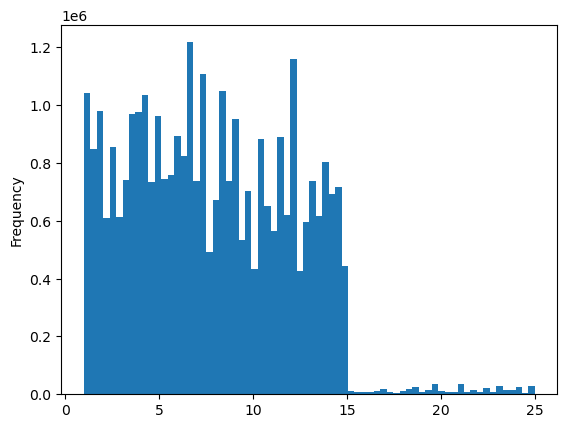

In [10]:
#create histogram again 
prices_histogram = df['prices'].plot.hist(bins = 70)

In [11]:
#Create sample for line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
#store 70% of df in big, 30% of df in small 
big = df[dev]
small = df[~dev]

In [13]:
#return only two columns from small df 
df_2 = small[['orders_day_of_week','prices']]

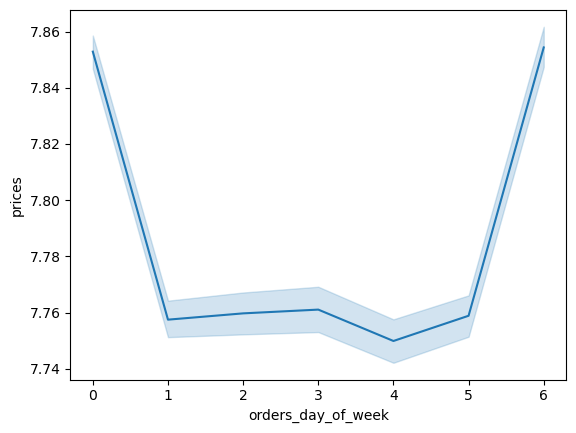

In [14]:
#create line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

Step 3: Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

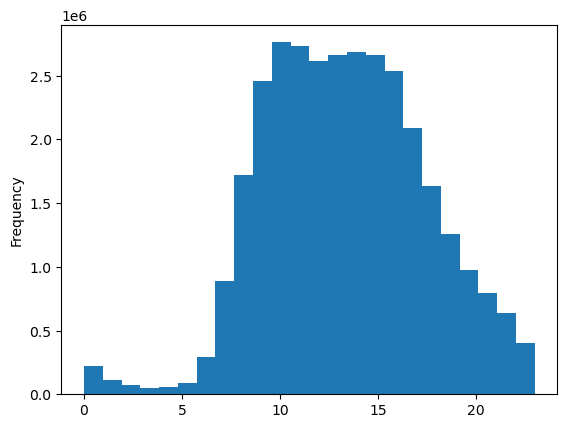

In [15]:
order_hour_hist = df['order_hour_of_day'].plot.hist(bins = 24)

Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

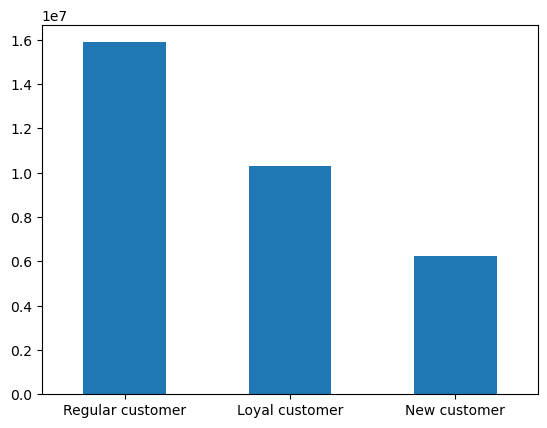

In [24]:
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(rot=0)

Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [17]:
#create new df from small sample set with 'prices' and 'order_hour_of_day'
df_3 = small[['prices', 'order_hour_of_day'] ]

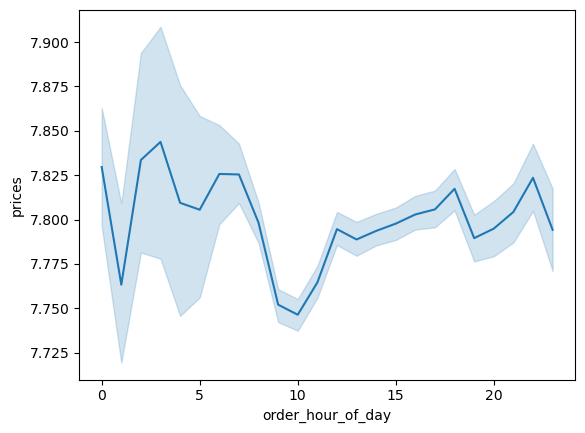

In [18]:
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

Step 6: determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [19]:
#create new df from small sample set with 'age' and 'dependents'
df_4 = small[['age', 'dependents'] ]

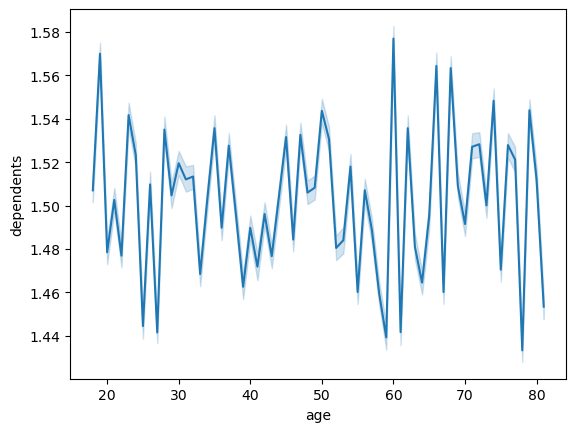

In [20]:
#create line chart 
line3 = sns.lineplot(data = df_4, x = 'age',y = 'dependents')

In [ ]:
df_5 = small['loyalty_flag', '']

Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

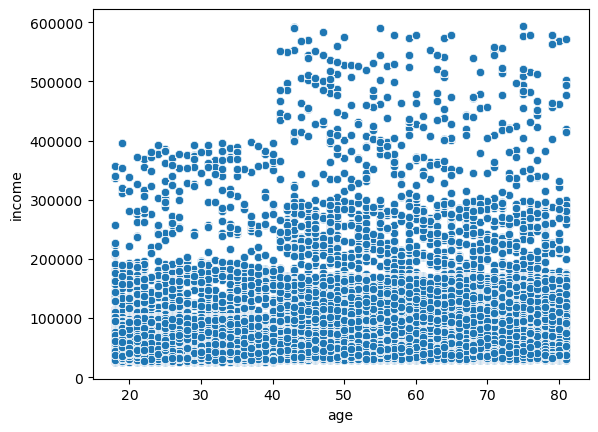

In [21]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df)

Step 8: Export visualizations 

In [22]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_dow.png'))
prices_histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ords_dow_prices.png'))
order_hour_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_ords_hod.png'))
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ords_hod_prices.png'))
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))